# Homework 3

## Andrew Loeppky

## P509, Fall '21

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import random

### Question 1 

Consider an (unnormalized) Cauchy distribution with mean a and width parameter $b$:

$$
f(x|a,b ) = \left(1 + \left(\frac{x-a}{b}\right)^2\right)^{-1}
$$

In this problem you will use Monte Carlo simulation to explore ways of estimating the model parameters from a data sample drawn from this underlying distribution.

**A.** Write a simulation that generates random numbers drawing from the above distribution. Briefly describe the method your routine uses. Show a plot of the output of your routine for 10000 simulated events, setting $a=0$ and $b=1$. Make the plot over the range -10 to 10, and superimpose a Cauchy distribution curve on top of the distribution to see if it agrees. (For the remainder of this problem you may take $a=0$ and $b=1$.)

---

Invert the Cauchy distribution for $x$:

$$
x = b\cdot\sqrt{\left(\frac{1}{y}-1\right)} + a \rightarrow x = \sqrt{\left(\frac{1}{y}-1\right)}
$$

integrate to get the PDF:

$$
\int dy \sqrt{\left(\frac{1}{y}-1\right)} = 2\left(\sqrt{\frac{1}{y-1}}\right)^{-1/2}
$$

NameError: name 'bound' is not defined

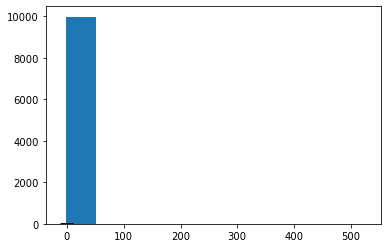

In [2]:
# calculate the exact soln
xmin = -10
xmax = 10


x_ext = np.linspace(xmin,xmax, 1000)
a = 0
b = 1
fx = (1 + ((x_ext - a) / b) ** 2) ** -1



# simulate it (simple transform not working, try hybrid as in lec 5
xrand = np.array([random.uniform(xmin,xmax) for i in range(10000)])
x = b * (1 / abs(xrand) - 1)

plt.hist(x, bins=10)
plt.plot(x_ext, fx, color='k')
plt.plot(x_ext, bound)
#plt.ylim(0,2)

**B.** An obvious estimator for the parameter $a$ is to calculate the mean of $N$ values. Suppose we draw 25 numbers from this distribution, and calculate their mean, which we'll denote by $x_{25}$. Simulate the distribution of $x_{25}$ for 10000 trials of this experiment, and plot the result.

**C.** Redo part B, but this time we'll estimate parameter a by averaging 100 samples. How does the width of the distribution for $x_{100}$ compare to that for $x_{25}$?

**D.** Develop a better estimator of $a$ (i.e. develop some function or algorithm of the 100 data points that yields a distribution for your estimate of parameter a with a smaller variance than $x_{100}$ does). Describe your method and show the simulated distribution of your new estimator. Is the method unbiased? Is it consistent?

**E.** Develop a useful estimator for $b$. Describe your method and show the simulated distribution of your new estimator. Is your estimator consistent? Is it unbiased? How efficient do you think it is?

**F.** You should have seen in parts B and C that the distribution of the mean didn't get narrower when more points were averaged. Justify this analytically by deriving the probability distribution for the average of two Cauchy random variables.

 <div class="page-break"></div>

### Question 2

The standard “lambda CDM” cosmology states that the scale factor (“size”) for the universe is given by the expression:

$$
a(t) = \left(\Omega_m / \Omega_\Lambda\right)^{\frac{1}{3}} sinh^{\frac{2}{3}}(t/t_\Lambda)
$$

where

$$
t_\Lambda \equiv 2 / (3H_0\sqrt{\Omega_\Lambda})
$$


If one sets $a(t)=1$ and solves for $t$, you get the current age of the universe. We are given the following measurements and constraints:

$$
H_0 = 67.27\pm 0.60 \text{ km/s per megaparsec}
$$

$$
\Omega_m = 0.3166 \pm 0.0084
$$

$$
\Omega_m \cdot(H_0)^3 = 96433 \pm 290
$$

$$
\Omega_m + \Omega_\Lambda = 1 \text{  (theoretical constraint)}
$$

Use these values to estimate the correlation between the uncertainties on $H_0$ and $\Omega_m$, and then use the above formulas and the error propagation equation to calculate the age of the universe and the uncertainty on its age.

---

$\Omega_m$ and $\Omega_\Lambda$ are perfectly *anticorrelated*, as any measured value of $\Omega_m$ completely determines the value of $\Omega_\Lambda$ (increasing $\Omega_m$ means decreasing $\Omega_\Lambda$).

 <div class="page-break"></div>

## Question 3

This is a parameter estimation problem from the world of cosmology.

**A.** Some telescope measures the luminosity of a series of Type Ia supernova at various redshifts. The redshift $z$ is measured with negligible uncertainty. The distance $D$ to the supernova (in arbitrary units) depends on redshift according to:

$$
D = 1/H_0 \cdot (z + 0.5\cdot z^2\cdot (1-q_0))
$$

Here, $H_0$ is Hubble's constant in appropriate units. The parameter $q_0$ describes the acceleration or deceleration of the universe's expansion, and depends on the densities of matter and dark energy in the universe according to:

$$
q0 = \Omega_M/2 - \Omega_\Lambda
$$

Assume henceforth that $\Omega_M + \Omega\Lambda = 1$. Also, all $\Omega$ parameters must be non-negative, since they are energy densities.

The apparent luminosity of the supernova is given by $L=L_0/D^2$, where $L_0$ is its intrinsic brightness. The astronomical magnitude of each supernova is given by:

$$
m = -2.5\cdot log_{10}(L)
$$

From studies of nearby supernovae, the random scatter in the magnitude m of a Type Ia supernova is $\pm$ 0.1, presumably due to some intrinsic random variation in the intrinsic brightness.

Attached is a file giving the measured $z$ and $m$ values for 100 Type Ia supernovae. Determine the best-fit and "1 sigma" uncertainty for $\Omega_\Lambda$ from this data.

In [ ]:
zm_dat = pd.read_csv("data_hw3.txt", sep="  ", engine='python')

**B.** A possible systematic uncertainty in this measurement is the possibility that the intrinsic luminosity of supernovae may evolve systematically with redshift. Suppose therefore that:

$$
L_0(z) = L_0\cdot (1+a\cdot z)
$$

Theoretical models indicate that $a=0 \pm 0.2$. Incorporating this as a new systematic to the calculation in Part A, calculate the total uncertainty on $\Omega_\Lambda$.

 <div class="page-break"></div>

## Question 4

Magnesium has three stable isotopes with atomic weights of 24, 25, and 26. You are given one mole of enriched magnesium. The block weighs 25.2 grams. You do not know the fractions of Mg-24, Mg-25, and Mg-26 in the block, only the total mass.

**A.** Let $p_1, p_2$, and $p_3$ be the fractions of Mg-24, Mg-25, and Mg-26 atoms in your sample. Obviously $p_1+p_2+p_3=1$. You also have the constraint that the total mass is 25.2g. Use maximum entropy principles to derive the joint probability distribution $P(p_1,p_2)$ that has the largest entropy given the constraints. (Hint: assume that the measure function $m(x)=$ constant when calculating the entropy of this continuous distribution---see the formula for the entropy of a continuous probability distribution in Gregory's book. Also, think carefully about the allowed ranges for each variable. The PDF won't depend upon $p_3$ because $p_1+p_2+p_3=1$ determines $p_3$.)

**B.** In a mass spectrometer we measure the weights of 20 atoms from the sample. We get these numbers:

Mg-24: 12

Mg-25: 3

Mg-26: 5

Using your maximum entropy PDF from part A as your prior, derive the posterior PDF for the parameter $p_1$, given this data (marginalizing over other parameters).

**C.** If the data were instead

Mg-24: 12

Mg-25: 7

Mg-26: 1

What do you get the posterior distribution for $p_1$? Interpret your answer---that is, if you get the same result as in B, argue why this makes sense. If you get a different result, explain why the differing amounts of Mg-25 and Mg-26 in your data sample change your inference about Mg-24.

 <div class="page-break"></div>

### Question 5

A Jeffreys' prior is a method for assigning a non-informative prior that is designed to be invariant under choice of parametrization. Jeffreys proposed the following prior:

$$
g(\Theta) \propto \sqrt{I(\Theta)}
$$

where $I(\Theta)$ is the Fisher information, which is related to the likelihood function $L(x|\Theta)$ by:

$$
I(\Theta) = \langle\left[\frac{\partial }{\partial\Theta}lnL(x|\Theta)\right]^2\rangle
$$

Here the angle brackets mean to take the average over outcomes, with $\Theta$ taken to be fixed inside the integral:

$$
I(\Theta) = \int dx \cdot lnL(x|\Theta)\left[\frac{\partial }{\partial\Theta}lnL(x|\Theta)\right]^2
$$

**A.** Consider a measurement in which we flip a single coin once, and want to estimate the probability $p$ for the coin coming up heads. Derive the Jeffreys prior $g(p)$ in this case.

**B.** Suppose that you start with this prior, then flip the coin three times, yielding three heads. What is the probability that $p<0.5$?

**C.** Suppose that some model relates $p$ to another parameter $\psi$ according to $p=\psi^4$. Derive the Jeffreys prior for $\psi$, starting with the likelihood for a single coin flip expressed as a function of $\psi$.

**D.** Demonstrate explicitly that if you take the Jeffreys prior for $\psi$ from Part C and do a change of variables to $p$, you get back the Jeffreys prior for $p$ that you found in part A. This will confirm that Jeffreys' procedure for generating priors encodes the same information for both of these parametrizations.

**E.** Finally, show that if you started with a uniform prior for $p$ and a uniform prior for $\psi$, then these priors are actually different after converting from one parametrization to another with a change of variables. Thus a uniform prior is not a Jeffreys prior for this problem.